In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [30]:
# Import the dataset
dataset = pd.read_csv('telecom_churn.csv')

#first five records
dataset.head(5)

# Print all the features
dataset.columns


Index(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype='object')

In [11]:
dataset = pd.read_csv("telecom_churn.csv")  # Replace with your file path
print(dataset.head())  # Check first few rows
print(dataset.info())  # Check data types and missing values
print(dataset.describe())  # Summary statistics


   customer_id telecom_partner gender  age              state     city  \
0            1    Reliance Jio      F   25          Karnataka  Kolkata   
1            2    Reliance Jio      F   55            Mizoram   Mumbai   
2            3        Vodafone      F   57  Arunachal Pradesh    Delhi   
3            4            BSNL      M   46         Tamil Nadu  Kolkata   
4            5            BSNL      F   26            Tripura    Delhi   

   pincode date_of_registration  num_dependents  estimated_salary  calls_made  \
0   755597           2020-01-01               4            124962          44   
1   125926           2020-01-01               2            130556          62   
2   423976           2020-01-01               0            148828          49   
3   522841           2020-01-01               1             38722          80   
4   740247           2020-01-01               2             55098          78   

   sms_sent  data_used  churn  
0        45       -361      0  
1   

In [12]:
dataset = dataset.dropna()  # Remove missing values


<ipython-input-13-a69a985f7aef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset['churn'], palette=['green', 'red'])


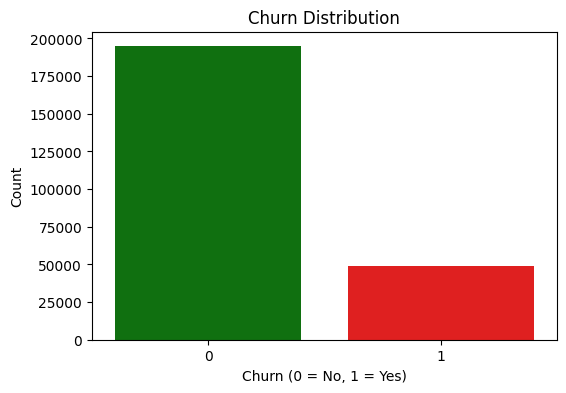

churn
0    194726
1     48827
Name: count, dtype: int64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for churn
plt.figure(figsize=(6,4))
sns.countplot(x=dataset['churn'], palette=['green', 'red'])
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

# Print counts
print(dataset['churn'].value_counts())


<ipython-input-14-dab3cc2d0afa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset['churn'], y=dataset['calls_made'], palette=['green', 'red'])


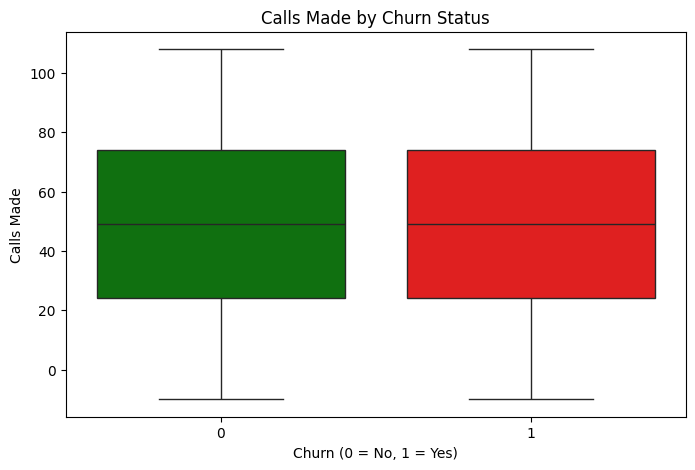

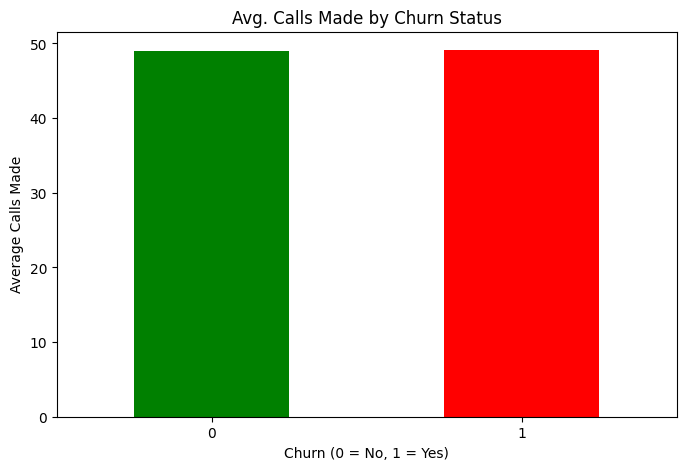

In [14]:
# Boxplot: Calls Made vs. Churn
plt.figure(figsize=(8,5))
sns.boxplot(x=dataset['churn'], y=dataset['calls_made'], palette=['green', 'red'])
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Calls Made')
plt.title('Calls Made by Churn Status')
plt.show()

# Bar Chart: Average Calls Made by Churners vs. Non-Churners
plt.figure(figsize=(8,5))
dataset.groupby('churn')['calls_made'].mean().plot(kind='bar', color=['green', 'red'])
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Average Calls Made')
plt.title('Avg. Calls Made by Churn Status')
plt.xticks(rotation=0)
plt.show()


In [15]:
# Churners vs Non-Churners
dataset['churn'].value_counts()


,count
churn,
0,194726
1,48827


In [16]:
# Count the number of churners and non-churners by State
print(dataset.groupby('state')['churn'].value_counts())


state              churn
Andhra Pradesh     0        6932
                   1        1717
Arunachal Pradesh  0        7015
                   1        1742
Assam              0        6812
                   1        1735
Bihar              0        6938
                   1        1695
Chhattisgarh       0        6991
                   1        1686
Goa                0        6959
                   1        1735
Gujarat            0        6886
                   1        1724
Haryana            0        6989
                   1        1751
Himachal Pradesh   0        6910
                   1        1772
Jharkhand          0        6906
                   1        1849
Karnataka          0        7013
                   1        1832
Kerala             0        7021
                   1        1704
Madhya Pradesh     0        7020
                   1        1797
Maharashtra        0        7064
                   1        1756
Manipur            0        6911
                  

State with max churn rate: Jharkhand (21.12%)


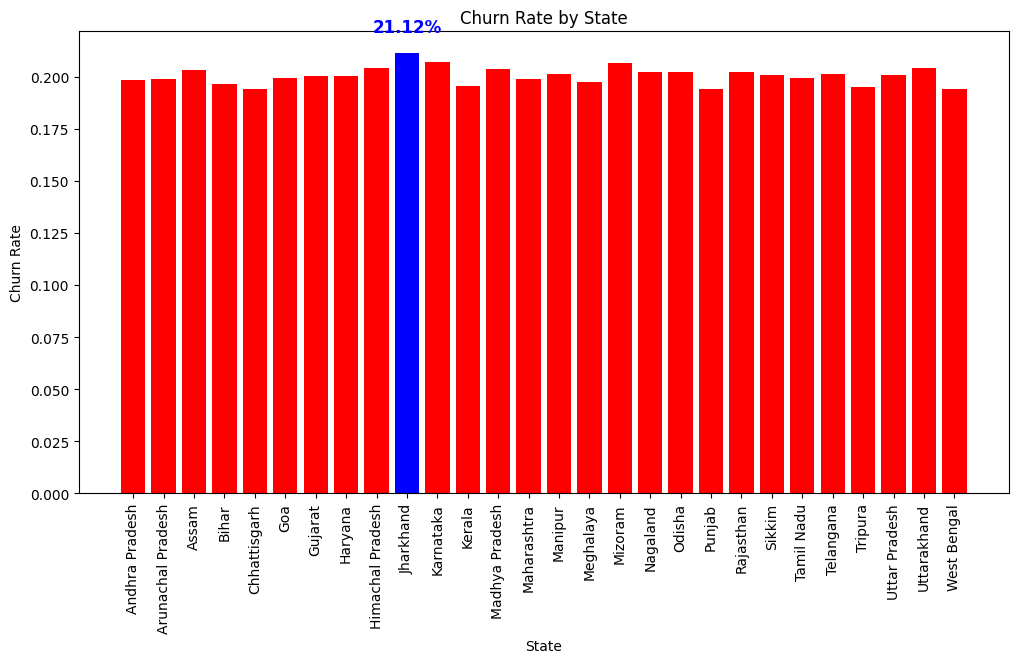

In [17]:
import matplotlib.pyplot as plt

# Count total customers and churned customers per state
state_counts=dataset.groupby('state')['churn'].value_counts().unstack().fillna(0)
state_counts['Churn_Rate']=state_counts[1]/(state_counts[0]+state_counts[1])

# Find state with max churn rate
max_churn_state=state_counts['Churn_Rate'].idxmax()
max_churn_rate=state_counts.loc[max_churn_state,'Churn_Rate']

print(f"State with max churn rate: {max_churn_state} ({max_churn_rate:.2%})")

# Plot churn rate across states
plt.figure(figsize=(12,6))
colors=['red' if state!=max_churn_state else 'blue' for state in state_counts.index]
plt.bar(state_counts.index,state_counts['Churn_Rate'],color=colors)
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by State')
plt.xticks(rotation=90)

# Highlight max churn rate state
plt.text(max_churn_state,max_churn_rate+0.01,f'{max_churn_rate:.2%}',ha='center',color='blue',fontsize=12,fontweight='bold')

plt.show()


In [18]:
# Check how many NaN values exist in churn
print(dataset['churn'].isna().sum())

# Remove rows where churn is missing
dataset = dataset.dropna(subset=['churn'])


0


In [19]:
dataset['churn'].fillna(0, inplace=True)


<ipython-input-19-5d362349eeb2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['churn'].fillna(0, inplace=True)


In [20]:
X = dataset.drop(['customer_id', 'date_of_registration', 'pincode', 'churn'], axis=1)
y = dataset['churn']


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode categorical variables
encoder = LabelEncoder()
dataset['telecom_partner'] = encoder.fit_transform(dataset['telecom_partner'])
dataset['gender'] = encoder.fit_transform(dataset['gender'])
dataset['state'] = encoder.fit_transform(dataset['state'])
dataset['city'] = encoder.fit_transform(dataset['city'])

# Select Features & Target
X = dataset.drop(['customer_id', 'date_of_registration', 'pincode', 'churn'], axis=1)
y = dataset['churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7991213483607399

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     38928
           1       0.00      0.00      0.00      9783

    accuracy                           0.80     48711
   macro avg       0.40      0.50      0.44     48711
weighted avg       0.64      0.80      0.71     48711


Confusion Matrix:
 [[38926     2]
 [ 9783     0]]


In [25]:
y_pred = model.predict(X_test)


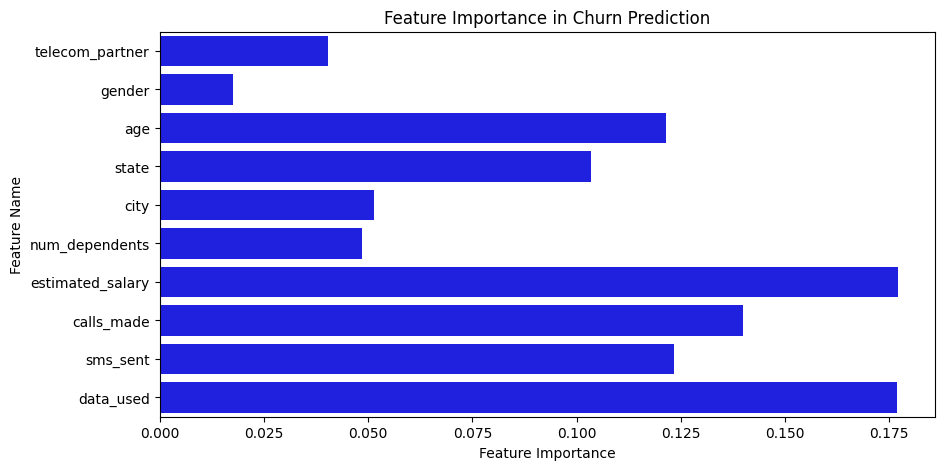

Maximum Feature Importance: estimated_salary - 0.17697994167094383


In [22]:
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=feature_names, color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Churn Prediction')
plt.show()
max_importance_index = importances.argmax()
max_importance_feature = feature_names[max_importance_index]
print(f'Maximum Feature Importance: {max_importance_feature} - {importances[max_importance_index]}')
